In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier


In [ ]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(data.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
X.shape

(569, 30)

In [ ]:
pca = PCA(n_components=2)  # Choose the number of components you want to keep
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

Optimal K: 8


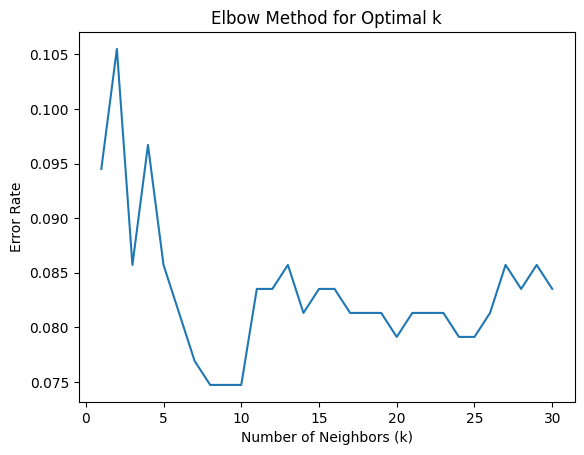

In [ ]:
# Range of k values to test
k_values = range(1, 31)

# Calculate error rates for different k values
error_rates = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Use 'accuracy' to get accuracy scores, and then calculate error rate as (1 - accuracy)
    scores = cross_val_score(knn, X_train_pca, y_train, cv=5, scoring='accuracy')
    error_rates.append(1 - np.mean(scores))

# Choose the k value at the elbow point
optimal_k = k_values[np.argmin(error_rates)]
print("Optimal K:", optimal_k)

# Plot the elbow curve
plt.plot(k_values, error_rates)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_pca, y_train)

KNeighborsClassifier(n_neighbors=8)

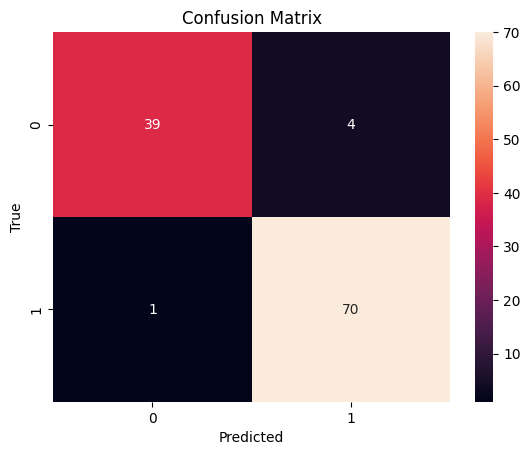

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
# Assuming 'knn' is your fitted KNeighborsClassifier model
y_pred = knn.predict(X_test_pca)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report (Score Sheet)
report = classification_report(y_test, y_pred)
print(report)

In [ ]:
# Initialize Random Forest model
rf = RandomForestClassifier(random_state=42)  # Set random state for reproducibility

# Fit the model to the training data
rf.fit(X_train_pca, y_train)

RandomForestClassifier(random_state=42)

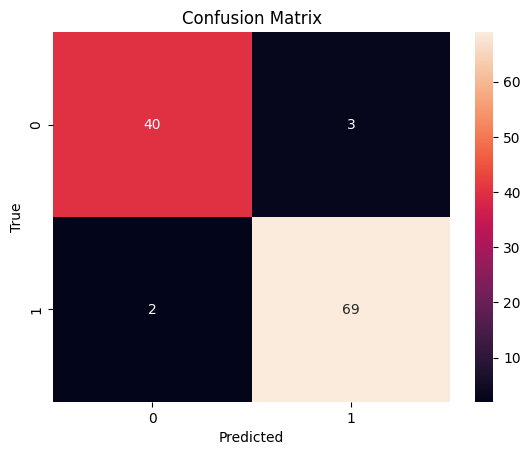

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
y_pred = rf.predict(X_test_pca)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report (Score Sheet)
report = classification_report(y_test, y_pred)
print(report)